## <center>STATISTICAL ANALYSIS </center>
## <center> OF OPERATIONAL RISK LOSSES (v 1.0)</center>
## <center>USING PYTHON PROGRAMMING LANGUAGE</center>

Statistical analysis of Operational Risk Losses with statistical tests (Multicollinearity (Variance Inflation Factor), t-test, one-way anova, post hoc test (Tukey's HSD (honestly significantly different) test and visualization of data using Python programming language.

The historical data for operational risk losses is downloaded from "OpVar" package for R and is used for computation within this notebook.

This project is made only for educational purposes to hone and show Python programming skills and knowledge of statistics and its methodologies, and do not attempt to make financial or methodological recommendation.

Prepared by Imir Osmanov.
Date: 08.05.2024.

## <center> EXECUTIVE SUMMARY </center>
### Purpose:
The purpose of this analysis is to apply statistical methodologies to analyze Operational Risks in Python programming language.

### Main findings:
The data for Operational Risk Losses of all types are not normally distributed and skewed to the left and have outliers.
But distribution of data by months of year and days of week show Uniform distribution with almost the same values and this means that Operational Risk Losses have equal probability of occuring in any month or day of week.

#### *A/B test*

A/B test shows that for Operational Risk Losses Type 1/Type2, Type 1/Type 3, Type 1/Type 4, Type 2/Type 3 and Type 3/Type 4 there are not statistically significant differences in the mean of these types of Operational Risk Losses. For pair of Operational Risk Losses Type 2/Type 4 it can be concluded that there is statistically significant difference between the mean of these types of Operational Risk Losses.

#### *One way ANOVA*

The results of One way ANOVA test shows as the p-value of One way ANOVA test is very small and below the threshold (alpha) we can reject the null hypothesis that the mean amount is the same for all types of Operational Risk Losses.

#### *ANOVA post hoc test*

As per the results of Tukey's HSD (honestly significantly different) test it can be concluded that for types of Operational Risk Losses: Loss_1/Loss_2, Loss_2/Loss_3, Loss_2/Loss_4 and Loss_3/Loss_4, they are the same or do not have statistically significant differences. It can be concluded that these types of Operational Risk Losses have not enough evidence to conclude a significant difference between the means of these types of Operational Risk Losses.
The Null Hypothesis for pairs of Operational Risk Losses: Loss_1/Loss_3 and Loss_1/Loss_4 can be rejected as p-value below the alpha = 0.05 and it can be concluded that they are not the same and there are a statistically significant differences between the means of these types of Operational Risk Losses.

### Methodology:
The methodology for statistical analysis is based on applying Multicollinearity (Variance Inflation Factor), t-test, One way ANOVA test and ANOVA post hoc test.
For dataframe analysis the Exploratory Data Analysis approach was used.

### Recommendations:
Further develop approach for analysis by applying statitical tests and methodologies to find statistically significant evidences and insights.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## 1. Downloading Required Data

#### Operational Risk Loss Type 1

In [2]:
# Downloading necessary files
# Operational losses type 1
filepath_1 = 'C:/Users/user/Documents/R studio/file1.xlsx'
df_loss_1 = pd.read_excel(filepath_1)
print(df_loss_1.head())
df_loss_1 = df_loss_1.rename(columns={'Loss': 'Loss_1'})
df_loss_1

   Loss  Period       Date
0  1877       1 2016-12-31
1  1807       1 2016-12-30
2   918       1 2016-12-30
3  1480       1 2016-12-29
4  1218       1 2016-12-27


,Loss_1,Period,Date
0,1877,1,2016-12-31
1,1807,1,2016-12-30
2,918,1,2016-12-30
3,1480,1,2016-12-29
4,1218,1,2016-12-27
...,...,...,...
1960,18,40,2007-01-11
1961,3313,40,2007-01-10
1962,1002,40,2007-01-10
1963,162,40,2007-01-07


#### Operational Risk Loss Type 2

In [3]:
# Downloading necessary files
# Operational losses type 2
filepath_2 = 'C:/Users/user/Documents/R studio/file2.xlsx'
df_loss_2 = pd.read_excel(filepath_2)
print(df_loss_2.head())
df_loss_2 = df_loss_2.rename(columns={'Loss': 'Loss_2'})
df_loss_2

   Loss  Period       Date
0   181       1 2016-12-31
1   610       1 2016-12-23
2   961       1 2016-12-19
3  1312       1 2016-12-19
4   259       1 2016-12-14


,Loss_2,Period,Date
0,181,1,2016-12-31
1,610,1,2016-12-23
2,961,1,2016-12-19
3,1312,1,2016-12-19
4,259,1,2016-12-14
...,...,...,...
2020,1953,40,2007-01-08
2021,425,40,2007-01-07
2022,69,40,2007-01-05
2023,2307,40,2007-01-04


#### Operational Risk Loss Type 3

In [4]:
# Downloading necessary files
# Operational losses type 3
filepath_3 = 'C:/Users/user/Documents/R studio/file3.xlsx'
df_loss_3 = pd.read_excel(filepath_3)
print(df_loss_3.head())
df_loss_3 = df_loss_3.rename(columns={'Loss': 'Loss_3'})
df_loss_3

   Loss  Period       Date
0  1334       1 2016-12-31
1  1067       1 2016-12-30
2  1068       1 2016-12-29
3   714       1 2016-12-26
4  1590       1 2016-12-26


,Loss_3,Period,Date
0,1334,1,2016-12-31
1,1067,1,2016-12-30
2,1068,1,2016-12-29
3,714,1,2016-12-26
4,1590,1,2016-12-26
...,...,...,...
1990,362,40,2007-01-04
1991,519,40,2007-01-03
1992,1003,40,2007-01-03
1993,943,40,2007-01-02


#### Operational Risk Loss Type 4

In [5]:
# Downloading necessary files
# Operational losses type 4
filepath_4 = 'C:/Users/user/Documents/R studio/file4.xlsx'
df_loss_4 = pd.read_excel(filepath_4)
print(df_loss_4.head())
df_loss_4 = df_loss_4.rename(columns={'Loss': 'Loss_4'})
df_loss_4

   Loss  Period       Date
0   650       1 2016-12-31
1   847       1 2016-12-30
2   242       1 2016-12-11
3   513       1 2016-12-09
4   264       1 2016-12-07


,Loss_4,Period,Date
0,650,1,2016-12-31
1,847,1,2016-12-30
2,242,1,2016-12-11
3,513,1,2016-12-09
4,264,1,2016-12-07
...,...,...,...
1936,1231,40,2007-01-05
1937,233,40,2007-01-05
1938,1861,40,2007-01-04
1939,1671,40,2007-01-03


## 2. Data Analysis

#### Operational Risk Loss Type 1

In [6]:
# Getting info on dimension of dataframe
df_loss_1.shape

(1965, 3)

In [7]:
# Getting summary on dataframe
df_loss_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Loss_1  1965 non-null   int64         
 1   Period  1965 non-null   int64         
 2   Date    1965 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 46.2 KB


In [8]:
# Checking for null values
df_loss_1.isna().sum()

Loss_1    0
Period    0
Date      0
dtype: int64

In [9]:
# Checking for duplicate values
df_loss_1.duplicated().sum()

0

Text(0.5, 1.0, 'Operational loss type 1')

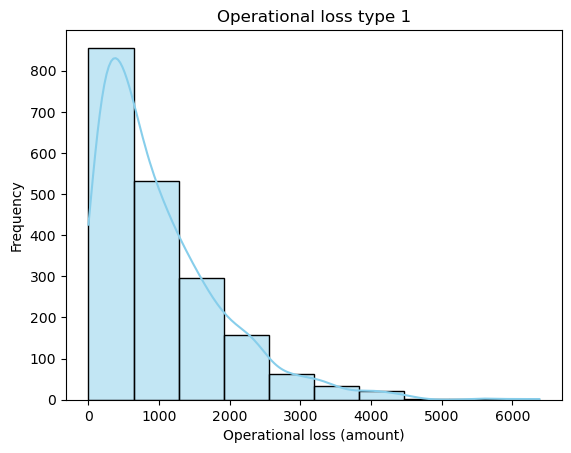

In [10]:
# Histogram of distribution of Operational Risk Losses type 1
sns.histplot(df_loss_1['Loss_1'], bins = 10, color = 'skyblue', kde = True)
plt.xlabel('Operational loss (amount)')
plt.ylabel('Frequency')
plt.title('Operational loss type 1')

Text(0.5, 1.0, 'Boxplot Operational Loss Type 1')

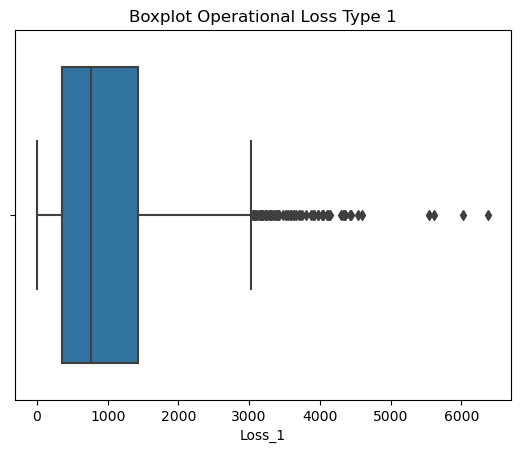

In [11]:
# Boxplot of distribution of Operational Risk Losses type 1
sns.boxplot(x = 'Loss_1', data = df_loss_1, showfliers = True, showbox = True)
plt.title('Boxplot Operational Loss Type 1')

In [12]:
# Extracting outliers from dataframe
Quartile_1 = np.percentile(df_loss_1['Loss_1'], 25)
Quartile_3 = np.percentile(df_loss_1['Loss_1'], 75)
IQR = Quartile_3 - Quartile_1
lower_bound = Quartile_1 - 1.5 * IQR
upper_bound = Quartile_3 + 1.5 * IQR
outliers_loss_1 = [x for x in df_loss_1['Loss_1'] if x < lower_bound or x > upper_bound]

print("Outliers (IQR method):", outliers_loss_1)

Outliers (IQR method): [4353, 3391, 4113, 3905, 4117, 4439, 4601, 3595, 3245, 3542, 3087, 4427, 3161, 3877, 3298, 3054, 3289, 3186, 3918, 3798, 4024, 3517, 3412, 3199, 4149, 3067, 3150, 3722, 3232, 3365, 3633, 3059, 3402, 4348, 6382, 3138, 4546, 3420, 3514, 6018, 3336, 3098, 3578, 4305, 3289, 4349, 3917, 3359, 3614, 3228, 3659, 3051, 3972, 3256, 3301, 4038, 5539, 3117, 3975, 3474, 3706, 4096, 5620, 3330, 4113, 4321, 3403, 3290, 4037, 3180, 3750, 3234, 3313]


In [13]:
# Getting descriptive statistics on dataframe
df_loss_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loss_1,1965.0,1016.951145,881.787605,5.0,359.0,760.0,1428.0,6382.0
Period,1965.0,20.513995,11.514377,1.0,10.0,21.0,30.0,40.0


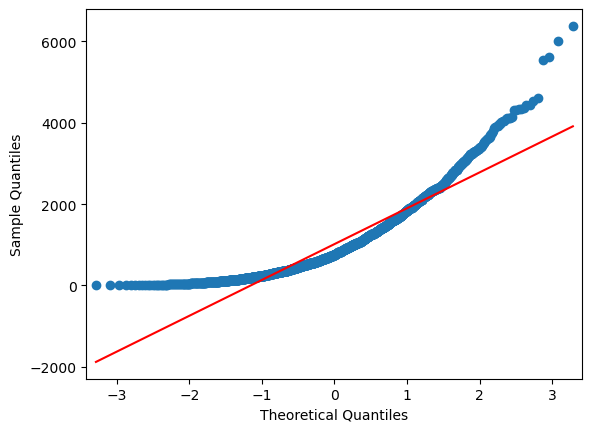

In [14]:
# Checking for normality assumption, Q-Q plot
fig = sm.qqplot(df_loss_1['Loss_1'], line = 's')
plt.show()

#### Findings:
There are 1965 records for Operational Risk Losses Type 1. The minimum amount of loss is 5, the maximum is 6382, the mean (average) is 1016.95 and median is 760.
The data is skewed to the left and show presence of outliers.
In the QQ plot, the data points do not follow a straight line, which indicates that data does not have a normal distribution.

#### Operational Risk Loss Type 2

In [15]:
# Getting info on dimension of dataframe
df_loss_2.shape

(2025, 3)

In [16]:
# Getting summary on dataframe
df_loss_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Loss_2  2025 non-null   int64         
 1   Period  2025 non-null   int64         
 2   Date    2025 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 47.6 KB


In [17]:
# Checking for null values
df_loss_2.isna().sum()

Loss_2    0
Period    0
Date      0
dtype: int64

In [18]:
# Checking for duplicate values
df_loss_2.duplicated().sum()

0

Text(0.5, 1.0, 'Operational loss type 2')

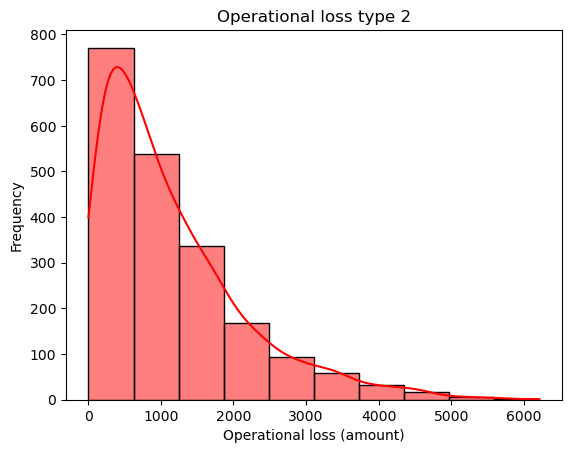

In [19]:
# Histogram of distribution of Operational Risk Losses type 2
sns.histplot(df_loss_2['Loss_2'], bins = 10, color = 'red', kde = True)
plt.xlabel('Operational loss (amount)')
plt.ylabel('Frequency')
plt.title('Operational loss type 2')

Text(0.5, 1.0, 'Boxplot Operational Loss Type 2')

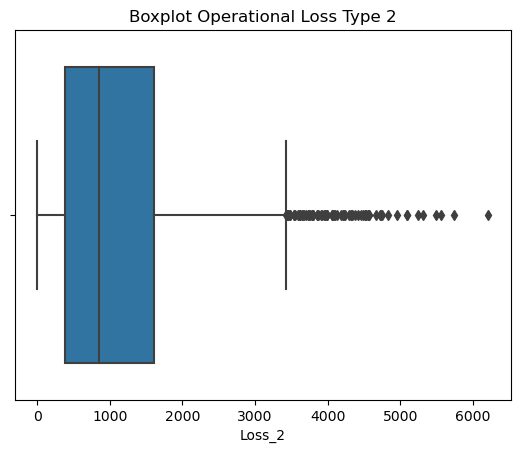

In [20]:
# Boxplot of distribution of Operational Risk Losses type 2
sns.boxplot(x = 'Loss_2', data = df_loss_2, showfliers = True, showbox = True)
plt.title('Boxplot Operational Loss Type 2')

In [21]:
# Extracting outliers from dataframe
Quartile_1 = np.percentile(df_loss_2['Loss_2'], 25)
Quartile_3 = np.percentile(df_loss_2['Loss_2'], 75)
IQR = Quartile_3 - Quartile_1
lower_bound = Quartile_1 - 1.5 * IQR
upper_bound = Quartile_3 + 1.5 * IQR
outliers_loss_2 = [x for x in df_loss_2['Loss_2'] if x < lower_bound or x > upper_bound]

print("Outliers (IQR method):", outliers_loss_2)

Outliers (IQR method): [3455, 3616, 3679, 4063, 3446, 3802, 3787, 3477, 3708, 4081, 4568, 3988, 3537, 3919, 3452, 3781, 3548, 4952, 3975, 3661, 3592, 3869, 6213, 4058, 4338, 4492, 5567, 3727, 4289, 4328, 3792, 4221, 4372, 4510, 4235, 4102, 4535, 5238, 4206, 4209, 4754, 4074, 3968, 4739, 5494, 4575, 3450, 4830, 3606, 4715, 3605, 3621, 4327, 4558, 5088, 4515, 3915, 3947, 3739, 4423, 4562, 4668, 3606, 3752, 4132, 5092, 4342, 3426, 3536, 3873, 3985, 3648, 5309, 4459, 3488, 5742, 4182, 3854, 3459]


In [22]:
# Getting descriptive statistics on dataframe
df_loss_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loss_2,2025.0,1139.487901,1000.868135,3.0,388.0,850.0,1603.0,6213.0
Period,2025.0,20.395062,11.628088,1.0,10.0,20.0,31.0,40.0


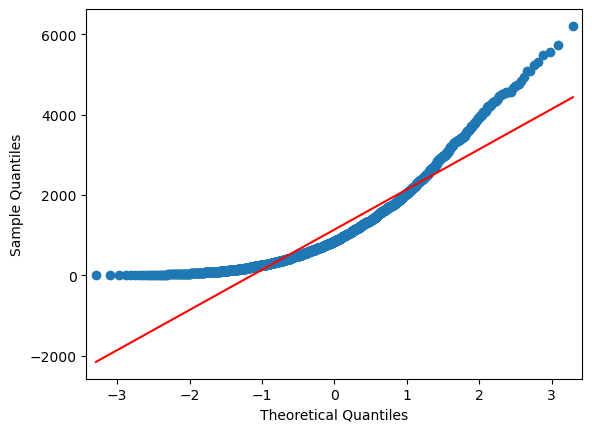

In [23]:
# Checking for normality assumption, Q-Q plot
fig = sm.qqplot(df_loss_2['Loss_2'], line = 's')
plt.show()

#### Findings:
There are 2025 records for Operational Risk Losses Type 2. The minimum amount of loss is 3, the maximum is 6213, the mean (average) is 1139.49 and median is 850.
The data is skewed to the left and show presence of outliers.
In the QQ plot, the data points do not follow a straight line, which indicates that data does not have a normal distribution.

#### Operational Risk Loss Type 3

In [24]:
# Getting info on dimension of dataframe
df_loss_3.shape

(1995, 3)

In [25]:
# Getting summary on dataframe
df_loss_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Loss_3  1995 non-null   int64         
 1   Period  1995 non-null   int64         
 2   Date    1995 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 46.9 KB


In [26]:
# Checking for null values
df_loss_3.isna().sum()

Loss_3    0
Period    0
Date      0
dtype: int64

In [27]:
# Checking for duplicate values
df_loss_3.duplicated().sum()

0

Text(0.5, 1.0, 'Operational loss type 3')

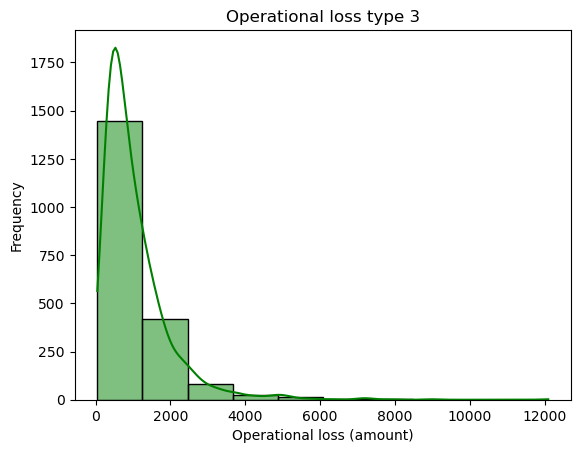

In [28]:
# Histogram of distribution of Operational Risk Losses type 3
sns.histplot(df_loss_3['Loss_3'], bins = 10, color = 'green', kde = True)
plt.xlabel('Operational loss (amount)')
plt.ylabel('Frequency')
plt.title('Operational loss type 3')

Text(0.5, 1.0, 'Boxplot Operational Loss Type 3')

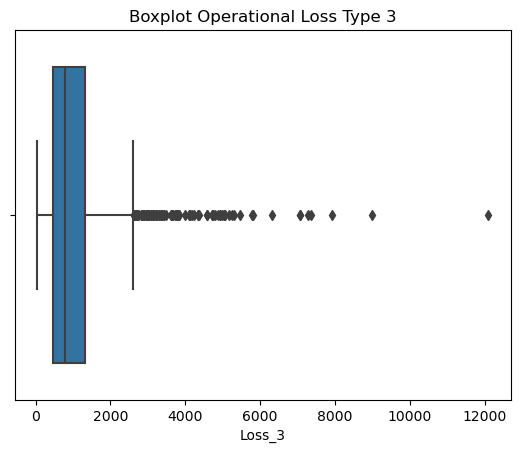

In [29]:
# Boxplot of distribution of Operational Risk Losses type 3
sns.boxplot(x = 'Loss_3', data = df_loss_3, showfliers = True, showbox = True)
plt.title('Boxplot Operational Loss Type 3')

In [30]:
# Extracting outliers from dataframe
Quartile_1 = np.percentile(df_loss_3['Loss_3'], 25)
Quartile_3 = np.percentile(df_loss_3['Loss_3'], 75)
IQR = Quartile_3 - Quartile_1
lower_bound = Quartile_1 - 1.5 * IQR
upper_bound = Quartile_3 + 1.5 * IQR
outliers_loss_3 = [x for x in df_loss_3['Loss_3'] if x < lower_bound or x > upper_bound]

print("Outliers (IQR method):", outliers_loss_3)

Outliers (IQR method): [3979, 2848, 2835, 8992, 3358, 3746, 2627, 3153, 2744, 2629, 3368, 4736, 7075, 2905, 7910, 2640, 3128, 4100, 2904, 3220, 2949, 7273, 2718, 2685, 3836, 3364, 4363, 4916, 5019, 4236, 3226, 3814, 2679, 3627, 3425, 3037, 2711, 3082, 2744, 4704, 3293, 5024, 3105, 2877, 2742, 3774, 3777, 2877, 2848, 3011, 4872, 4332, 3717, 2622, 2842, 2944, 3249, 2630, 2718, 6310, 3673, 5802, 3008, 3436, 4348, 5159, 3307, 3169, 3618, 4793, 5305, 3040, 4190, 3794, 5467, 2682, 4111, 3632, 5050, 2697, 3479, 3837, 2869, 3649, 2947, 4726, 5256, 2874, 2684, 2964, 4127, 7058, 4569, 12092, 3345, 5774, 4584, 4934, 3376, 3163, 2731, 3349, 3073, 2818, 3253, 7349, 4981]


In [31]:
# Getting descriptive statistics on dataframe
df_loss_3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loss_3,1995.0,1051.507268,940.738532,48.0,464.0,788.0,1325.0,12092.0
Period,1995.0,20.231579,11.871702,1.0,10.0,20.0,31.0,40.0


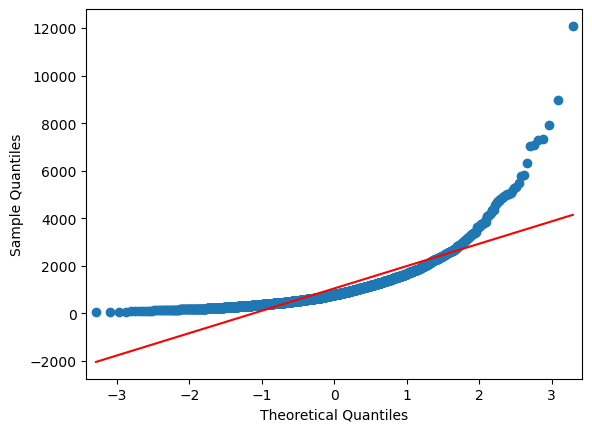

In [32]:
# Checking for normality assumption, Q-Q plot
fig = sm.qqplot(df_loss_3['Loss_3'], line = 's')
plt.show()

#### Findings:
There are 1995 records for Operational Risk Losses Type 3. The minimum amount of loss is 48, the maximum is 12092, the mean (average) is 1051.51 and median is 788.
The data is skewed to the left and show presence of outliers.
In the QQ plot, the data points do not follow a straight line, which indicates that data does not have a normal distribution.

#### Operational Risk Loss Type 4

In [33]:
# Getting info on dimension of dataframe
df_loss_4.shape

(1941, 3)

In [34]:
# Getting summary on dataframe
df_loss_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Loss_4  1941 non-null   int64         
 1   Period  1941 non-null   int64         
 2   Date    1941 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 45.6 KB


In [35]:
# Checking for null values
df_loss_4.isna().sum()

Loss_4    0
Period    0
Date      0
dtype: int64

In [36]:
# Checking for duplicate values
df_loss_4.duplicated().sum()

0

Text(0.5, 1.0, 'Operational loss type 4')

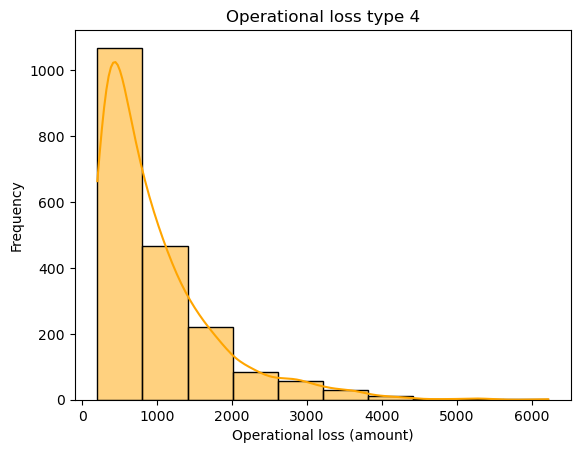

In [37]:
# Histogram of distribution of Operational Risk Losses type 4
sns.histplot(df_loss_4['Loss_4'], bins = 10, color = 'orange', kde = True)
plt.xlabel('Operational loss (amount)')
plt.ylabel('Frequency')
plt.title('Operational loss type 4')

Text(0.5, 1.0, 'Boxplot Operational Loss Type 4')

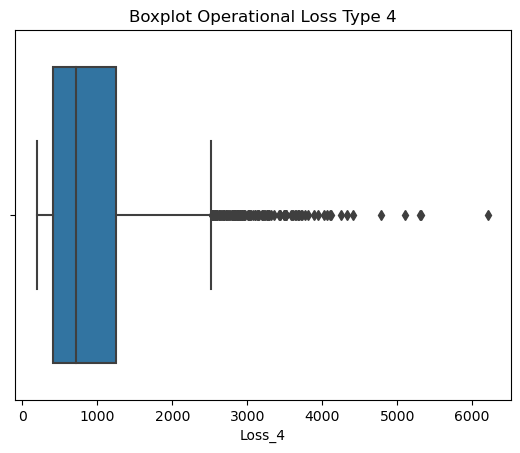

In [38]:
# Boxplot of distribution of Operational Risk Losses type 4
sns.boxplot(x = 'Loss_4', data = df_loss_4, showfliers = True, showbox = True)
plt.title('Boxplot Operational Loss Type 4')

In [39]:
# Extracting outliers from dataframe
Quartile_1 = np.percentile(df_loss_4['Loss_4'], 25)
Quartile_3 = np.percentile(df_loss_4['Loss_4'], 75)
IQR = Quartile_3 - Quartile_1
lower_bound = Quartile_1 - 1.5 * IQR
upper_bound = Quartile_3 + 1.5 * IQR
outliers_loss_4 = [x for x in df_loss_4['Loss_4'] if x < lower_bound or x > upper_bound]

print("Outliers (IQR method):", outliers_loss_1)

Outliers (IQR method): [4353, 3391, 4113, 3905, 4117, 4439, 4601, 3595, 3245, 3542, 3087, 4427, 3161, 3877, 3298, 3054, 3289, 3186, 3918, 3798, 4024, 3517, 3412, 3199, 4149, 3067, 3150, 3722, 3232, 3365, 3633, 3059, 3402, 4348, 6382, 3138, 4546, 3420, 3514, 6018, 3336, 3098, 3578, 4305, 3289, 4349, 3917, 3359, 3614, 3228, 3659, 3051, 3972, 3256, 3301, 4038, 5539, 3117, 3975, 3474, 3706, 4096, 5620, 3330, 4113, 4321, 3403, 3290, 4037, 3180, 3750, 3234, 3313]


In [40]:
# Getting descriptive statistics on dataframe
df_loss_4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loss_4,1941.0,969.105100,781.152228,201.0,411.0,717.0,1255.0,6215.0
Period,1941.0,20.519835,11.498106,1.0,11.0,20.0,30.0,40.0


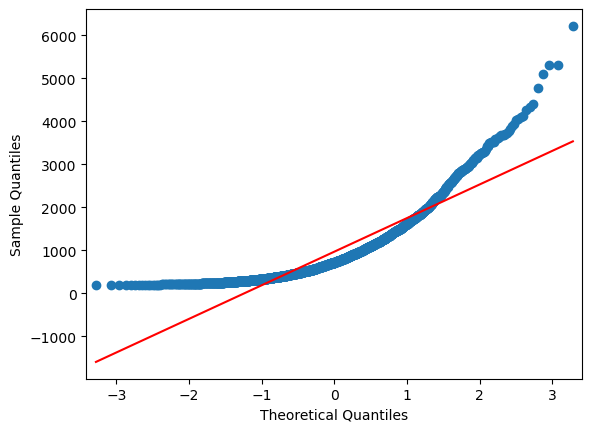

In [41]:
# Checking for normality assumption, Q-Q plot
fig = sm.qqplot(df_loss_4['Loss_4'], line = 's')
plt.show()

#### Findings:
There are 1941 records for Operational Risk Losses Type 4. The minimum amount of loss is 201, the maximum is 6215, the mean (average) is 969.11 and median is 717.
The data is skewed to the left and show presence of outliers.
In the QQ plot, the data points do not follow a straight line, which indicates that data does not have a normal distribution.

## 3. Operational Risk Losses analysis by types

#### Operational Risk Losses Type 1

#### The day with the highest number of Operational Risk Losses

In [42]:
# Calculating the day with the highest number of Operational Risk Losses Type 1
df_loss_1.groupby(['Date']).size().sort_values(ascending=False).head(10)

Date
2009-10-31    5
2007-07-23    4
2013-08-26    4
2010-12-01    4
2012-03-31    3
2015-11-24    3
2013-05-16    3
2010-11-19    3
2010-03-09    3
2015-04-08    3
dtype: int64

#### The months with the highest number of Operational Risk Losses

In [43]:
# Calculating the month with the highest number of Operational Risk Losses Type 1
df_loss_1['Month'] = df_loss_1['Date'].dt.month
df_loss_1.groupby(['Month']).size().sort_values(ascending=False).head(13)

Month
11    179
12    179
10    173
8     169
2     168
3     162
7     162
1     161
4     160
5     158
6     147
9     147
dtype: int64

In [44]:
# Create a new `month_txt` column.
df_loss_1['Month_txt'] = df_loss_1['Date'].dt.month_name().str.slice(stop=3)
df_loss_1.head()

,Loss_1,Period,Date,Month,Month_txt
0,1877,1,2016-12-31,12,Dec
1,1807,1,2016-12-30,12,Dec
2,918,1,2016-12-30,12,Dec
3,1480,1,2016-12-29,12,Dec
4,1218,1,2016-12-27,12,Dec


In [45]:
# Create a new helper dataframe for plotting.
loss_by_month_1 = df_loss_1.groupby(['Month','Month_txt']).count().sort_values('Month', ascending=True).head(12).reset_index()
loss_by_month_1

,Month,Month_txt,Loss_1,Period,Date
0,1,Jan,161,161,161
1,2,Feb,168,168,168
2,3,Mar,162,162,162
3,4,Apr,160,160,160
4,5,May,158,158,158
5,6,Jun,147,147,147
6,7,Jul,162,162,162
7,8,Aug,169,169,169
8,9,Sep,147,147,147
9,10,Oct,173,173,173


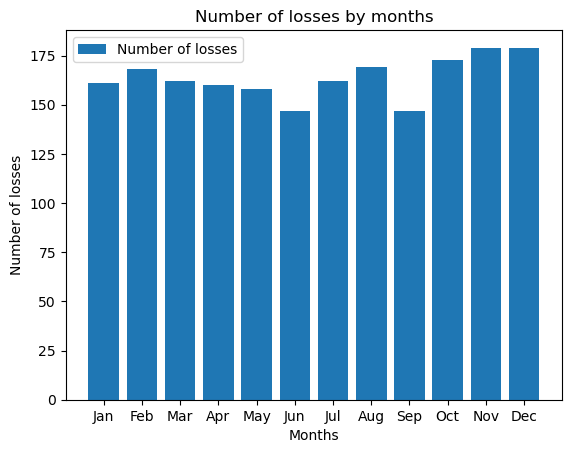

In [46]:
# Ploting distribution of losses by months
plt.bar(x=loss_by_month_1['Month_txt'],height= loss_by_month_1['Date'], label="Number of losses")
plt.plot()

plt.xlabel("Months")
plt.ylabel("Number of losses")
plt.title("Number of losses by months")
plt.legend()
plt.show()

In [47]:
# Calculating the day of week with the highest number of Operational Risk Losses Type 1
df_loss_1['Day_of_week'] = df_loss_1['Date'].dt.dayofweek
df_loss_1['Day_of_week_name'] = df_loss_1['Date'].dt.day_name()

# Group by the day of the week and count the number of losses for each day
losses_by_dayofweek_1 = df_loss_1.groupby('Day_of_week_name')['Loss_1'].count()
losses_by_dayofweek_1

Day_of_week_name
Friday       279
Monday       267
Saturday     287
Sunday       273
Thursday     283
Tuesday      293
Wednesday    283
Name: Loss_1, dtype: int64

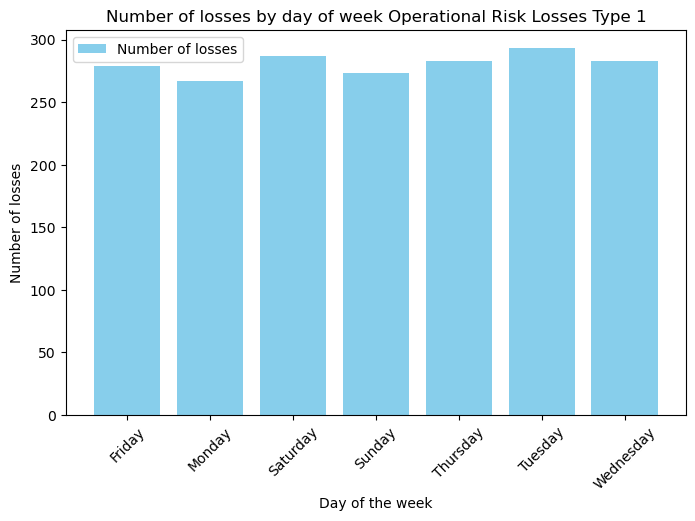

In [48]:
# Ploting distribution of Operational Risk Losses by days of week
days_of_week = losses_by_dayofweek_1.index
loss_counts = losses_by_dayofweek_1.values

plt.figure(figsize=(8, 5))
plt.bar(x=days_of_week, height=loss_counts, color='skyblue', label="Number of losses")

plt.xlabel("Day of the week")
plt.ylabel("Number of losses")
plt.title("Number of losses by day of week Operational Risk Losses Type 1")
plt.legend()

plt.xticks(rotation=45)
plt.show()

### Findings:
For Operational Risk Losses Type 1:
The day with the highest number of losses: 2010-10-31 when 5 losses realized.
The month of year with the highest number of losses: November and December with 179 losses realized.
The distribution of losses for months of years forms Uniform distribution and losses are almost equally distributed among months.
This means that Operational Risks Type 1 has equal probability of realization in any month of year.
The day of week with the highest losses: Tuesday with 293 losses realized on this day of week.
The distribution of losses for day of week also shows that losses are almost equally distributed among days of week.
This means that Operational Risks Type 1 have equal probability of realization in any day of week.

#### Operational Risk Losses Type 2

#### The day with the highest number of Operational Risk Losses

In [49]:
# Calculating the day with the highest number of Operational Risk Losses Type 2
df_loss_2.groupby(['Date']).size().sort_values(ascending=False).head(10)

Date
2014-01-09    5
2012-12-11    5
2010-03-30    4
2016-01-20    4
2008-05-02    4
2012-03-21    4
2014-01-07    4
2015-05-30    4
2011-12-19    4
2011-03-20    4
dtype: int64

#### The months with the highest number of Operational Risk Losses

In [50]:
# Calculating the month with the highest number of Operational Risk Losses Type 1
df_loss_2['Month'] = df_loss_2['Date'].dt.month
df_loss_2.groupby(['Month']).size().sort_values(ascending=False).head(13)

Month
5     187
2     181
1     176
8     176
3     175
4     173
11    173
6     168
12    160
9     158
10    153
7     145
dtype: int64

In [51]:
# Create a new `month_txt` column.
df_loss_2['Month_txt'] = df_loss_2['Date'].dt.month_name().str.slice(stop=3)
df_loss_2.head()

,Loss_2,Period,Date,Month,Month_txt
0,181,1,2016-12-31,12,Dec
1,610,1,2016-12-23,12,Dec
2,961,1,2016-12-19,12,Dec
3,1312,1,2016-12-19,12,Dec
4,259,1,2016-12-14,12,Dec


In [52]:
# Create a new helper dataframe for plotting.
loss_by_month_2 = df_loss_2.groupby(['Month','Month_txt']).count().sort_values('Month', ascending=True).head(12).reset_index()
loss_by_month_2

,Month,Month_txt,Loss_2,Period,Date
0,1,Jan,176,176,176
1,2,Feb,181,181,181
2,3,Mar,175,175,175
3,4,Apr,173,173,173
4,5,May,187,187,187
5,6,Jun,168,168,168
6,7,Jul,145,145,145
7,8,Aug,176,176,176
8,9,Sep,158,158,158
9,10,Oct,153,153,153


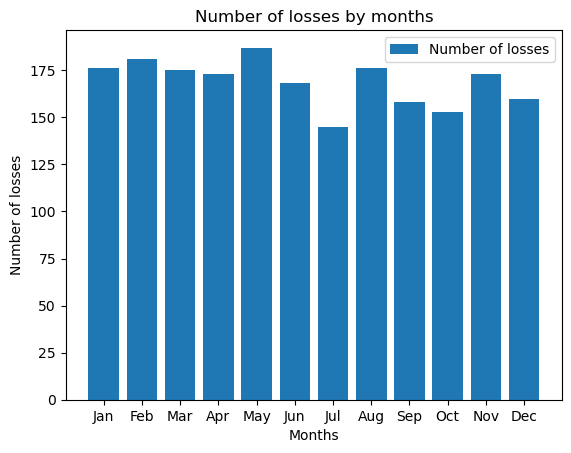

In [53]:
# Ploting distribution of losses by months
plt.bar(x=loss_by_month_2['Month_txt'],height= loss_by_month_2['Date'], label="Number of losses")
plt.plot()

plt.xlabel("Months")
plt.ylabel("Number of losses")
plt.title("Number of losses by months")
plt.legend()
plt.show()

In [54]:
# Calculating the day of week with the highest number of Operational Risk Losses Type 2
df_loss_2['Day_of_week'] = df_loss_2['Date'].dt.dayofweek
df_loss_2['Day_of_week_name'] = df_loss_2['Date'].dt.day_name()

# Group by the day of the week and count the number of losses for each day
losses_by_dayofweek_2 = df_loss_2.groupby('Day_of_week_name')['Loss_2'].count()
losses_by_dayofweek_2

Day_of_week_name
Friday       290
Monday       285
Saturday     269
Sunday       296
Thursday     293
Tuesday      310
Wednesday    282
Name: Loss_2, dtype: int64

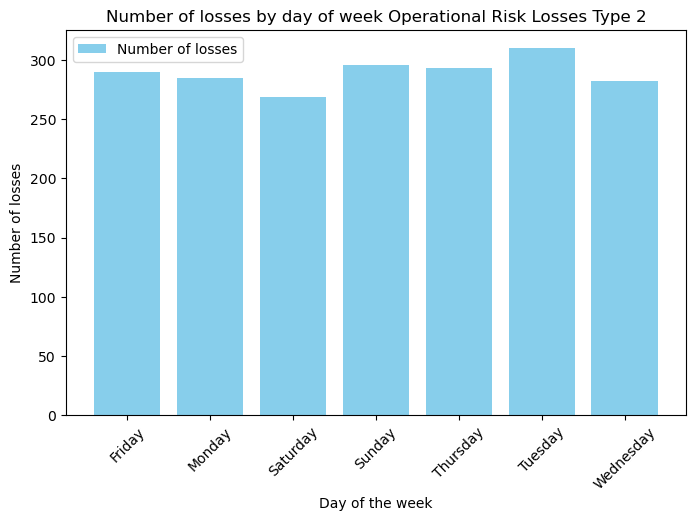

In [55]:
# Ploting distribution of Operational Risk Losses Type 2 by days of week
days_of_week2 = losses_by_dayofweek_2.index
loss_counts2 = losses_by_dayofweek_2.values

plt.figure(figsize=(8, 5))
plt.bar(x=days_of_week2, height=loss_counts2, color='skyblue', label="Number of losses")

plt.xlabel("Day of the week")
plt.ylabel("Number of losses")
plt.title("Number of losses by day of week Operational Risk Losses Type 2")
plt.legend()

plt.xticks(rotation=45)
plt.show()

### Findings:
For Operational Risk Losses Type 2:
The day with the highest number of losses: 2014-01-09 and 2012-12-11 when 5 losses realized.
The month of year with the highest number of losses: May with 187 losses realized.
The distribution of losses for months of years forms Uniform distribution and losses are almost equally distributed among months.
This means that Operational Risks Type 2 has equal probability of realization in any month of year.
The day of week with the highest losses: Tuesday with 310 losses realized on this day of week.
The distribution of losses for day of week also shows that losses are almost equally distributed among days of week.
This means that Operational Risks Type 2 has equal probability of realization in any day of week.

#### Operational Risk Losses Type 3

#### The day with the highest number of Operational Risk Losses

In [56]:
# Calculating the day with the highest number of Operational Risk Losses Type 3
df_loss_3.groupby(['Date']).size().sort_values(ascending=False).head(10)

Date
2008-11-19    5
2007-06-22    4
2010-03-07    4
2013-03-18    4
2015-01-06    4
2016-12-26    4
2012-12-21    4
2008-03-14    3
2016-06-28    3
2015-03-01    3
dtype: int64

#### The months with the highest number of Operational Risk Losses

In [57]:
# Calculating the month with the highest number of Operational Risk Losses Type 3
df_loss_3['Month'] = df_loss_3['Date'].dt.month
df_loss_3.groupby(['Month']).size().sort_values(ascending=False).head(12)

Month
11    195
1     192
8     174
6     173
5     171
3     164
4     162
12    161
10    158
7     156
9     149
2     140
dtype: int64

In [58]:
# Create a new `month_txt` column.
df_loss_3['Month_txt'] = df_loss_3['Date'].dt.month_name().str.slice(stop=3)
df_loss_3.head()

,Loss_3,Period,Date,Month,Month_txt
0,1334,1,2016-12-31,12,Dec
1,1067,1,2016-12-30,12,Dec
2,1068,1,2016-12-29,12,Dec
3,714,1,2016-12-26,12,Dec
4,1590,1,2016-12-26,12,Dec


In [59]:
# Create a new helper dataframe for plotting.
loss_by_month_3 = df_loss_3.groupby(['Month','Month_txt']).count().sort_values('Month', ascending=True).head(12).reset_index()
loss_by_month_3

,Month,Month_txt,Loss_3,Period,Date
0,1,Jan,192,192,192
1,2,Feb,140,140,140
2,3,Mar,164,164,164
3,4,Apr,162,162,162
4,5,May,171,171,171
5,6,Jun,173,173,173
6,7,Jul,156,156,156
7,8,Aug,174,174,174
8,9,Sep,149,149,149
9,10,Oct,158,158,158


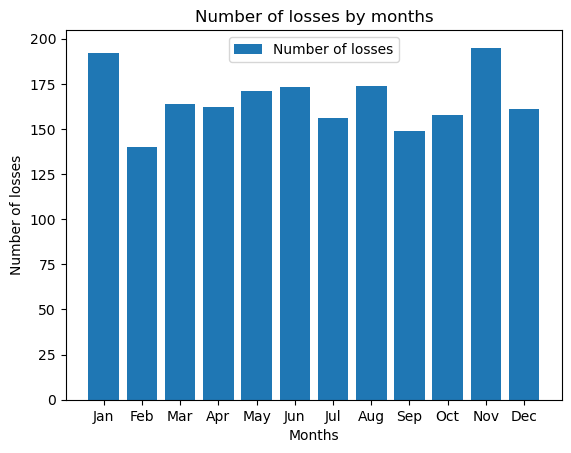

In [60]:
# Ploting distribution of losses by months
plt.bar(x=loss_by_month_3['Month_txt'],height= loss_by_month_3['Date'], label="Number of losses")
plt.plot()

plt.xlabel("Months")
plt.ylabel("Number of losses")
plt.title("Number of losses by months")
plt.legend()
plt.show()

In [61]:
# Calculating the day of week with the highest number of Operational Risk Losses Type 3
df_loss_3['Day_of_week'] = df_loss_3['Date'].dt.dayofweek
df_loss_3['Day_of_week_name'] = df_loss_3['Date'].dt.day_name()

# Group by the day of the week and count the number of losses for each day
losses_by_dayofweek_3 = df_loss_3.groupby('Day_of_week_name')['Loss_3'].count()
losses_by_dayofweek_3

Day_of_week_name
Friday       310
Monday       315
Saturday     258
Sunday       297
Thursday     296
Tuesday      256
Wednesday    263
Name: Loss_3, dtype: int64

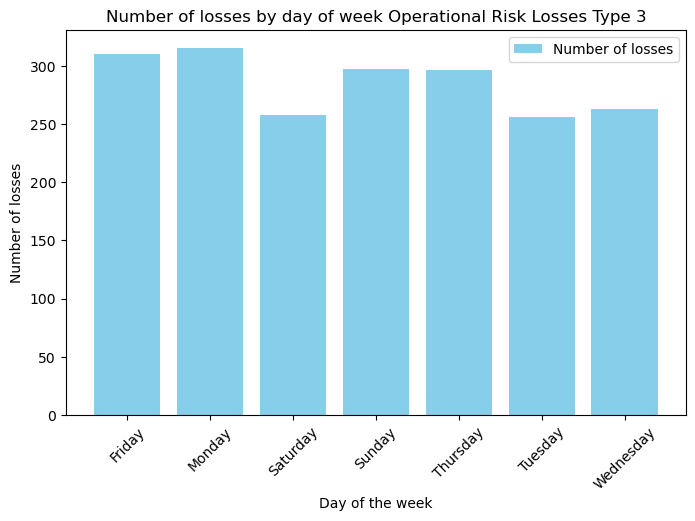

In [62]:
# Ploting distribution of Operational Risk Losses Type 3 by days of week
days_of_week3 = losses_by_dayofweek_3.index
loss_counts3 = losses_by_dayofweek_3.values

plt.figure(figsize=(8, 5))
plt.bar(x=days_of_week3, height=loss_counts3, color='skyblue', label="Number of losses")

plt.xlabel("Day of the week")
plt.ylabel("Number of losses")
plt.title("Number of losses by day of week Operational Risk Losses Type 3")
plt.legend()

plt.xticks(rotation=45)
plt.show()

### Findings:
For Operational Risk Losses Type 3:
The day with the highest number of losses: 2018-11-19 when 5 losses realized.
The month of year with the highest number of losses: November with 195 losses realized.
The distribution of losses for months of years forms Uniform distribution and losses are almost equally distributed among months.
This means that Operational Risks Type 3 has equal probability of realization in any month of year.
The day of week with the highest losses: Monday with 315 losses realized on this day of week.
The distribution of losses for day of week also shows that losses are almost equally distributed among days of week.
This means that Operational Risks Type 3 has equal probability of realization in any day of week.

#### Operational Risk Losses Type 4

#### The day with the highest number of Operational Risk Losses

In [63]:
# Calculating the day with the highest number of Operational Risk Losses Type 4
df_loss_4.groupby(['Date']).size().sort_values(ascending=False).head(10)

Date
2012-02-28    4
2009-07-04    4
2007-11-16    4
2013-06-09    4
2012-06-01    4
2008-04-25    4
2012-01-24    3
2016-06-11    3
2013-05-19    3
2012-11-19    3
dtype: int64

#### The months with the highest number of Operational Risk Losses

In [64]:
# Calculating the month with the highest number of Operational Risk Losses Type 4
df_loss_4['Month'] = df_loss_4['Date'].dt.month
df_loss_4.groupby(['Month']).size().sort_values(ascending=False).head(12)

Month
2     193
1     184
11    172
5     161
6     161
8     157
4     155
7     155
12    153
3     152
10    151
9     147
dtype: int64

In [65]:
# Create a new `month_txt` column.
df_loss_4['Month_txt'] = df_loss_4['Date'].dt.month_name().str.slice(stop=3)
df_loss_4.head()

,Loss_4,Period,Date,Month,Month_txt
0,650,1,2016-12-31,12,Dec
1,847,1,2016-12-30,12,Dec
2,242,1,2016-12-11,12,Dec
3,513,1,2016-12-09,12,Dec
4,264,1,2016-12-07,12,Dec


In [66]:
# Create a new helper dataframe for plotting.
loss_by_month_4 = df_loss_4.groupby(['Month','Month_txt']).count().sort_values('Month', ascending=True).head(12).reset_index()
loss_by_month_4

,Month,Month_txt,Loss_4,Period,Date
0,1,Jan,184,184,184
1,2,Feb,193,193,193
2,3,Mar,152,152,152
3,4,Apr,155,155,155
4,5,May,161,161,161
5,6,Jun,161,161,161
6,7,Jul,155,155,155
7,8,Aug,157,157,157
8,9,Sep,147,147,147
9,10,Oct,151,151,151


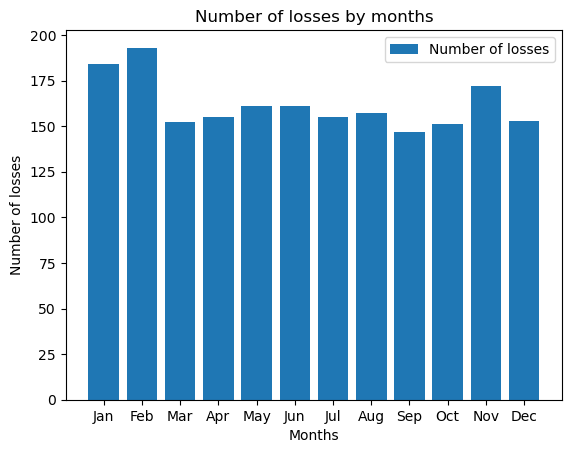

In [67]:
# Ploting distribution of losses by months
plt.bar(x=loss_by_month_4['Month_txt'],height= loss_by_month_4['Date'], label="Number of losses")
plt.plot()

plt.xlabel("Months")
plt.ylabel("Number of losses")
plt.title("Number of losses by months")
plt.legend()
plt.show()

In [68]:
# Calculating the day of week with the highest number of Operational Risk Losses Type 4
df_loss_4['Day_of_week'] = df_loss_4['Date'].dt.dayofweek
df_loss_4['Day_of_week_name'] = df_loss_4['Date'].dt.day_name()

# Group by the day of the week and count the number of losses for each day
losses_by_dayofweek_4 = df_loss_4.groupby('Day_of_week_name')['Loss_4'].count()
losses_by_dayofweek_4

Day_of_week_name
Friday       289
Monday       259
Saturday     282
Sunday       283
Thursday     263
Tuesday      284
Wednesday    281
Name: Loss_4, dtype: int64

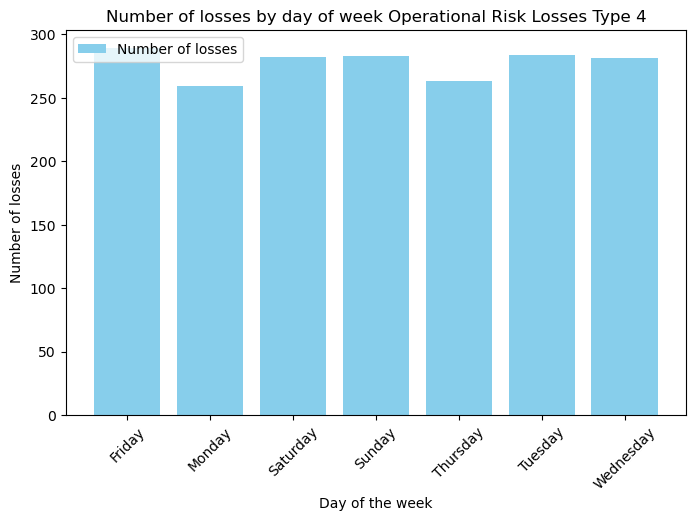

In [69]:
# Ploting distribution of Operational Risk Losses Type 4 by days of week
days_of_week4 = losses_by_dayofweek_4.index
loss_counts4 = losses_by_dayofweek_4.values

plt.figure(figsize=(8, 5))
plt.bar(x=days_of_week4, height=loss_counts4, color='skyblue', label="Number of losses")

plt.xlabel("Day of the week")
plt.ylabel("Number of losses")
plt.title("Number of losses by day of week Operational Risk Losses Type 4")
plt.legend()

plt.xticks(rotation=45)
plt.show()

### Findings:
For Operational Risk Losses Type 4:
The day with the highest number of losses: 2007-11-16, 2008-04-25, 2009-07-04, 2012-02-28, 2012-06-01, 2013-06-09, when 4 losses realized.
The month of year with the highest number of losses: February with 193 losses realized.
The distribution of losses for months of years forms Uniform distribution and losses are almost equally distributed among months.
This means that Operational Risks Type 4 has equal probability of realization in any month of year.
The day of week with the highest losses: Friday with 289 losses realized on this day of week.
The distribution of losses for day of week also shows that losses are almost equally distributed among days of week.
This means that Operational Risks Type 4 has equal probability of realization in day of week.

## 4. Data Preprocessing

In [70]:
# Creating combined dataframe
combined_losses = pd.concat([df_loss_1, df_loss_2, df_loss_3, df_loss_4], axis=1)
combined_losses

,Loss_1,Period,Date,Month,Month_txt,Day_of_week,Day_of_week_name,Loss_2,Period,Date,...,Month_txt,Day_of_week,Day_of_week_name,Loss_4,Period,Date,Month,Month_txt,Day_of_week,Day_of_week_name
0,1877.0,1.0,2016-12-31,12.0,Dec,5.0,Saturday,181,1,2016-12-31,...,Dec,5.0,Saturday,650.0,1.0,2016-12-31,12.0,Dec,5.0,Saturday
1,1807.0,1.0,2016-12-30,12.0,Dec,4.0,Friday,610,1,2016-12-23,...,Dec,4.0,Friday,847.0,1.0,2016-12-30,12.0,Dec,4.0,Friday
2,918.0,1.0,2016-12-30,12.0,Dec,4.0,Friday,961,1,2016-12-19,...,Dec,3.0,Thursday,242.0,1.0,2016-12-11,12.0,Dec,6.0,Sunday
3,1480.0,1.0,2016-12-29,12.0,Dec,3.0,Thursday,1312,1,2016-12-19,...,Dec,0.0,Monday,513.0,1.0,2016-12-09,12.0,Dec,4.0,Friday
4,1218.0,1.0,2016-12-27,12.0,Dec,1.0,Tuesday,259,1,2016-12-14,...,Dec,0.0,Monday,264.0,1.0,2016-12-07,12.0,Dec,2.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,NaN,NaN,NaT,NaN,NaN,NaN,NaN,1953,40,2007-01-08,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2021,NaN,NaN,NaT,NaN,NaN,NaN,NaN,425,40,2007-01-07,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2022,NaN,NaN,NaT,NaN,NaN,NaN,NaN,69,40,2007-01-05,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaT,NaN,NaN,NaN,NaN,2307,40,2007-01-04,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [71]:
# Dropping unnecessary columns
combined_losses = combined_losses.drop(columns = ['Period', 'Month', 'Month_txt', 'Day_of_week', 'Day_of_week_name'])
combined_losses

,Loss_1,Date,Loss_2,Date,Loss_3,Date,Loss_4,Date
0,1877.0,2016-12-31,181,2016-12-31,1334.0,2016-12-31,650.0,2016-12-31
1,1807.0,2016-12-30,610,2016-12-23,1067.0,2016-12-30,847.0,2016-12-30
2,918.0,2016-12-30,961,2016-12-19,1068.0,2016-12-29,242.0,2016-12-11
3,1480.0,2016-12-29,1312,2016-12-19,714.0,2016-12-26,513.0,2016-12-09
4,1218.0,2016-12-27,259,2016-12-14,1590.0,2016-12-26,264.0,2016-12-07
...,...,...,...,...,...,...,...,...
2020,NaN,NaT,1953,2007-01-08,NaN,NaT,NaN,NaT
2021,NaN,NaT,425,2007-01-07,NaN,NaT,NaN,NaT
2022,NaN,NaT,69,2007-01-05,NaN,NaT,NaN,NaT
2023,NaN,NaT,2307,2007-01-04,NaN,NaT,NaN,NaT


In [72]:
# Preparing data for Pie Chart / calculation of total values of Operational Risk Losses by types
total_by_loss_type = combined_losses.sum(numeric_only=True)

# Display the total by loss type
total_by_loss_type

Loss_1    1998309.0
Loss_2    2307463.0
Loss_3    2097757.0
Loss_4    1881033.0
dtype: float64

In [73]:
# Preparing data for Line Chart / calculation of total losses by years
df_loss_1['Year'] = df_loss_1['Date'].dt.year

losses_by_year_1 = df_loss_1.groupby('Year').sum(numeric_only=True)
losses_by_year_1 = losses_by_year_1.drop(columns = ['Period', 'Month', 'Day_of_week'])
losses_by_year_1

,Loss_1
Year,
2007,197794
2008,169858
2009,209149
2010,242653
2011,199290
2012,205356
2013,182134
2014,205737
2015,203407


In [74]:
# Preparing data for Line Chart / calculation of total losses by years
df_loss_2['Year'] = df_loss_2['Date'].dt.year

losses_by_year_2 = df_loss_2.groupby('Year').sum(numeric_only=True)
losses_by_year_2 = losses_by_year_2.drop(columns = ['Period', 'Month', 'Day_of_week'])
losses_by_year_2

,Loss_2
Year,
2007,152238
2008,324336
2009,170378
2010,179231
2011,130305
2012,388732
2013,241990
2014,216113
2015,273708


In [75]:
# Preparing data for Line Chart / calculation of total losses by years
df_loss_3['Year'] = df_loss_3['Date'].dt.year

losses_by_year_3 = df_loss_3.groupby('Year').sum(numeric_only=True)
losses_by_year_3 = losses_by_year_3.drop(columns = ['Period', 'Month',  'Day_of_week'])
losses_by_year_3

,Loss_3
Year,
2007,261574
2008,197556
2009,228453
2010,182215
2011,106357
2012,198776
2013,171045
2014,160183
2015,297289


In [76]:
# Preparing data for Line Chart / calculation of total losses by years
df_loss_4['Year'] = df_loss_4['Date'].dt.year

losses_by_year_4 = df_loss_4.groupby('Year').sum(numeric_only=True)
losses_by_year_4 = losses_by_year_4.drop(columns = ['Period', 'Month', 'Day_of_week'])
losses_by_year_4

,Loss_4
Year,
2007,170358
2008,147054
2009,194448
2010,196172
2011,149914
2012,261536
2013,265626
2014,169521
2015,146861


In [77]:
# Preparing data for Bubble Plot / merging dataframe with all types of Operational Risk Losses
merged_losses = pd.concat([losses_by_year_1, losses_by_year_2, losses_by_year_3, losses_by_year_4], axis =1)
merged_losses

,Loss_1,Loss_2,Loss_3,Loss_4
Year,,,,
2007,197794,152238,261574,170358
2008,169858,324336,197556,147054
2009,209149,170378,228453,194448
2010,242653,179231,182215,196172
2011,199290,130305,106357,149914
2012,205356,388732,198776,261536
2013,182134,241990,171045,265626
2014,205737,216113,160183,169521
2015,203407,273708,297289,146861


In [78]:
# Preparing data for Bubble Plot / set "Year" as index
merged_losses.index = map(int, merged_losses.index)
merged_losses.index.name = 'Year'
merged_losses.reset_index(inplace=True)
merged_losses.head()

,Year,Loss_1,Loss_2,Loss_3,Loss_4
0,2007,197794,152238,261574,170358
1,2008,169858,324336,197556,147054
2,2009,209149,170378,228453,194448
3,2010,242653,179231,182215,196172
4,2011,199290,130305,106357,149914


## 5. Data Visualization

### Pie Chart of types of Operational Risk Losses

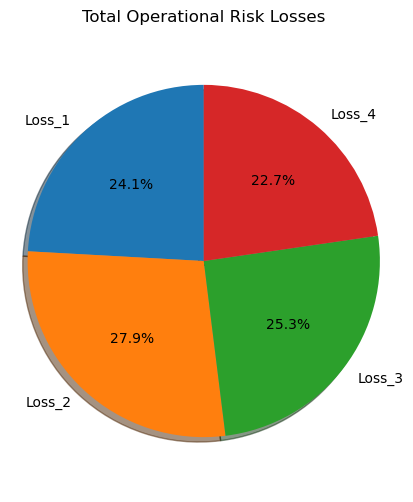

In [79]:
# Ploting Pie Chart
total_by_loss_type.plot(kind = 'pie',
                            figsize = (5, 6),
                            autopct = '%1.1f%%',
                            startangle = 90,
                            shadow = True,
                           )
plt.title('Total Operational Risk Losses')
plt.axis('equal')
plt.show()

### Line Chart of types of Operational Risk Losses

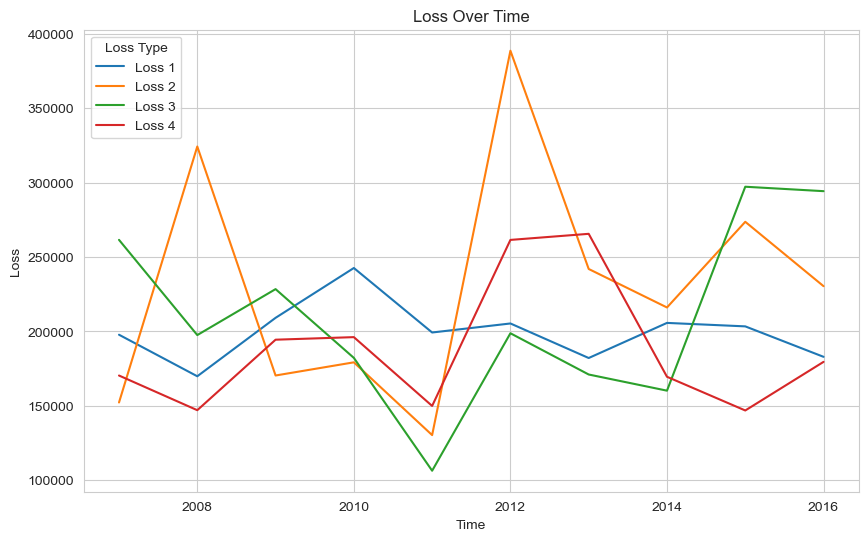

In [80]:
# Ploting Line Chart of types of Operational Risk Losses
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=losses_by_year_1['Loss_1'], label='Loss 1')
sns.lineplot(data=losses_by_year_2['Loss_2'], label='Loss 2')
sns.lineplot(data=losses_by_year_3['Loss_3'], label='Loss 3')
sns.lineplot(data=losses_by_year_4['Loss_4'], label='Loss 4')

plt.xlabel('Time')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend(title='Loss Type', loc='upper left')
plt.show()

### Bubble Plot

In [81]:
# normalization of Operational Risk Losses Type 1 data
norm_loss_1 = (merged_losses['Loss_1'] - merged_losses['Loss_1'].min()) / (merged_losses['Loss_1'].max() - merged_losses['Loss_1'].min())

# normalization of Operational Risk Losses Type 2 data
norm_loss_2 = (merged_losses['Loss_2'] - merged_losses['Loss_2'].min()) / (merged_losses['Loss_2'].max() - merged_losses['Loss_2'].min())

# normalization of Operational Risk Losses Type 3 data
norm_loss_3 = (merged_losses['Loss_3'] - merged_losses['Loss_3'].min()) / (merged_losses['Loss_3'].max() - merged_losses['Loss_3'].min())

# normalization of Operational Risk Losses Type 4 data
norm_loss_4 = (merged_losses['Loss_4'] - merged_losses['Loss_4'].min()) / (merged_losses['Loss_4'].max() - merged_losses['Loss_4'].min())

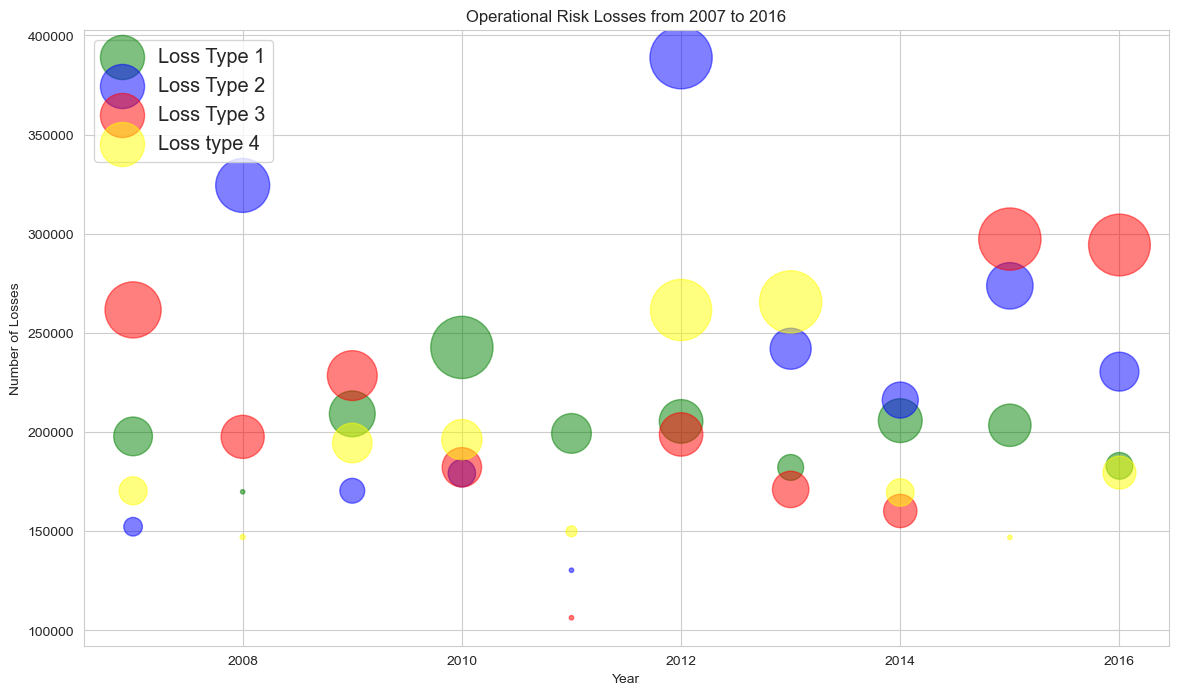

In [82]:
# Ploting Bubble Plot
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(merged_losses['Year'], merged_losses['Loss_1'], alpha=0.5, color='green', s=norm_loss_1 * 2000 + 10, label='Loss Type 1')
ax.scatter(merged_losses['Year'], merged_losses['Loss_2'], alpha=0.5, color='blue', s=norm_loss_2 * 2000 + 10, label='Loss Type 2')
ax.scatter(merged_losses['Year'], merged_losses['Loss_3'], alpha=0.5, color='red', s=norm_loss_3 * 2000 + 10, label='Loss Type 3')
ax.scatter(merged_losses['Year'], merged_losses['Loss_4'], alpha=0.5, color='yellow', s=norm_loss_4 * 2000 + 10, label='Loss type 4')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Losses')
ax.set_title('Operational Risk Losses from 2007 to 2016')
ax.legend(loc='upper left', fontsize='x-large')
plt.show()

### Boxplot of types of Operational Risk Losses 

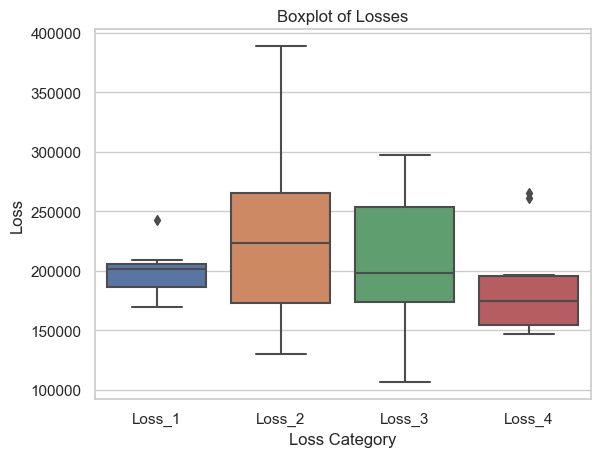

In [83]:
# Ploting Boxplot of Operational Risk Losses
sns.set(style="whitegrid")

sns.boxplot(data=merged_losses[['Loss_1', 'Loss_2', 'Loss_3', 'Loss_4']])
plt.xlabel('Loss Category')
plt.ylabel('Loss')
plt.title('Boxplot of Losses')

plt.show()

## 6. Statistical Analysis (Tests)

### Checking Correlation and Multicollinearity

In [84]:
# Creating the correlation matrix
correlation_matrix = combined_losses.corr(numeric_only=True)
correlation_matrix

,Loss_1,Loss_2,Loss_3,Loss_4
Loss_1,1.000000,-0.038831,-0.061763,-0.008824
Loss_2,-0.038831,1.000000,0.024133,0.037544
Loss_3,-0.061763,0.024133,1.000000,-0.036308
Loss_4,-0.008824,0.037544,-0.036308,1.000000


Correlation Matrix


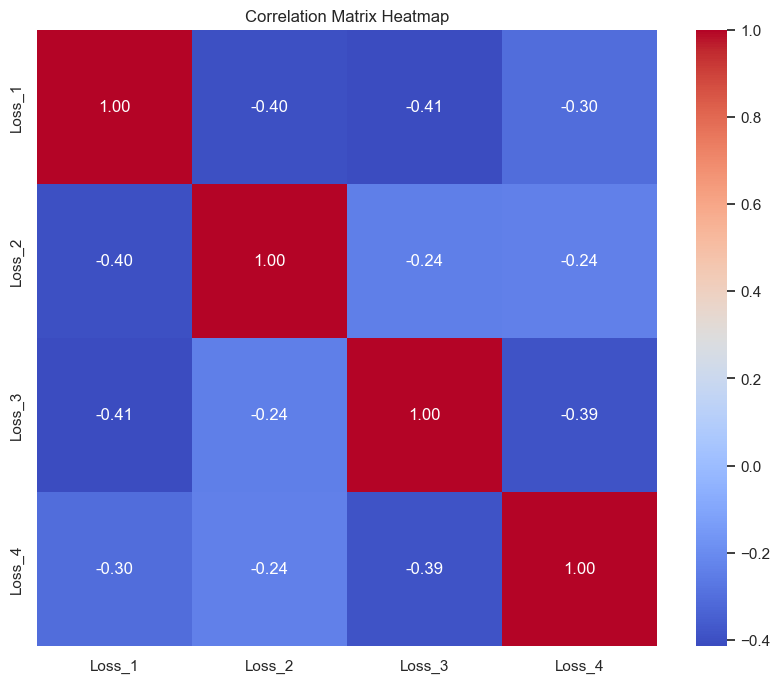

In [85]:
# Creating correlation matrix heatmap for variables
correlation_df1 = correlation_matrix[['Loss_1', 'Loss_2', 'Loss_3', 'Loss_4']]
correlation_matrix1 = correlation_df1.corr()
print('Correlation Matrix')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [86]:
# Calculating the Variance Inflation Factor (test on Multicollinearity).

variable = combined_losses.copy()
variable = variable[['Loss_1', 'Loss_2', 'Loss_3', 'Loss_4']]
variable.loc[:, :] = variable.replace([np.inf, -np.inf], np.nan)
variable.dropna(inplace=True)
df_vif = [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]
df_vif

[1.7669181803120073,
 1.8806583452115337,
 1.7746053316178263,
 1.9488775121712445]

### Findings:
The Operational Risk Losses of all types have moderate negative correlation between each other.
The highest nagative correlation between Loss_type1 and Loss_type2 = -0.41 and the lowest correlation is between Loss_type2 and Loss_type3 and Loss_type4 = -0.24.
The Multicollinearity test (Variance Inflation Factor) show that there is weak Multicollinearity between all types of Opeartional Risk Losses.

### Statistical Test (t-test), A/B test
Applying statistical t-test to determine if there is a significant difference between the means of two types of Operational Risk Losses.

#### Creating samples of data for each type of Operational Risk Losses

In [87]:
# Creating a sample of Operational Risk Loss Type 1
sampled_loss_1 = df_loss_1.sample(n=20, replace = True, random_state=14250)

In [88]:
# Creating a sample of Operational Risk Loss Type 2
sampled_loss_2 = df_loss_2.sample(n=20, replace = True, random_state=14250)

In [89]:
# Creating a sample of Operational Risk Loss Type 3
sampled_loss_3 = df_loss_3.sample(n=20, replace = True, random_state=14250)

In [90]:
# Creating a sample of Operational Risk Loss Type 4
sampled_loss_4 = df_loss_4.sample(n=20, replace = True, random_state=14250)

#### Calculating the mean of the samples

In [91]:
# Calculating the mean of Operational Risk Loss Type 1
sample_mean_1 = sampled_loss_1['Loss_1'].mean()
sample_mean_1

1016.0

In [92]:
# Calculating the mean of Operational Risk Loss Type 2
sample_mean_2 = sampled_loss_2['Loss_2'].mean()
sample_mean_2

1460.5

In [93]:
# Calculating the mean of Operational Risk Loss Type 3
sample_mean_3 = sampled_loss_3['Loss_3'].mean()
sample_mean_3

947.6

In [94]:
# Calculating the mean of Operational Risk Loss Type 4
sample_mean_4 = sampled_loss_4['Loss_4'].mean()
sample_mean_4

689.75

#### Hypothesis formulation:
H0: There is no difference in sample mean of Loss_1 and Loss_2

H1: There is a difference in sample mean of Loss_1 and Loss_2

Set significance level (alpha) p = 0.05

In [95]:
# Hypothesis test, A/B test
stats.ttest_ind(a=sampled_loss_1['Loss_1'], b=sampled_loss_2['Loss_2'], equal_var=False)

Ttest_indResult(statistic=-1.4744285416786722, pvalue=0.14886241105848522)

The p-value = 0.14886 and more than the significance level, we can conclude there is not a statistically significant difference in the mean loss amount between Loss_1 and Loss_2. We fail to reject the null hypothesis 𝐻0. It’s likely that the difference in the two means is due to chance.

In other words, observed difference between the types of Operational Risk Losses could likely be due to random variability rather than a nature of risk. It doesn't necessarily mean that there is no difference; rather, it means that the evidence in the data is not strong enough to confidently conclude that there is a difference.

#### Hypothesis formulation:
H0: There is no difference in sample mean of Loss_1 and Loss_3

H1: There is a difference in sample mean of Loss_1 and Loss_3

Set significance level (alpha) p = 0.05

In [96]:
# Hypothesis test, A/B test
stats.ttest_ind(a=sampled_loss_1['Loss_1'], b=sampled_loss_3['Loss_3'], equal_var=False)

Ttest_indResult(statistic=0.27280742072238906, pvalue=0.786530732560007)

The p-value = 0.78653 and more than the significance level, we can conclude there is not a statistically significant difference in the mean loss amount between Loss_1 and Loss_3. We fail to reject the null hypothesis 𝐻0.  It’s likely that the difference in the two means is due to chance.


In other words, observed difference between the types of Operational Risk Losses could likely be due to random variability rather than a nature of risk. It doesn't necessarily mean that there is no difference; rather, it means that the evidence in the data is not strong enough to confidently conclude that there is a difference.

#### Hypothesis formulation:
H0: There is no difference in sample mean of Loss_1 and Loss_4

H1: There is a difference in sample mean of Loss_1 and Loss_4

Set significance level (alpha) p = 0.05

In [97]:
# Hypothesis test, A/B test
stats.ttest_ind(a=sampled_loss_1['Loss_1'], b=sampled_loss_4['Loss_4'], equal_var=False)

Ttest_indResult(statistic=1.5197420645326543, pvalue=0.1400267029308741)

The p-value = 0.14002 and more than the significance level, we can conclude there is not a statistically significant difference in the mean loss amount between Loss_1 and Loss_4. We fail to reject the null hypothesis 𝐻0.  It’s likely that the difference in the two means is due to chance.

In other words, observed difference between the types of Operational Risk Losses could likely be due to random variability rather than a nature of risk. It doesn't necessarily mean that there is no difference; rather, it means that the evidence in the data is not strong enough to confidently conclude that there is a difference.

#### Hypothesis formulation:
H0: There is no difference in sample mean of Loss_2 and Loss_3

H1: There is a difference in sample mean of Loss_2 and Loss_3

Set significance level (alpha) p = 0.05

In [98]:
# Hypothesis test, A/B test
stats.ttest_ind(a=sampled_loss_2['Loss_2'], b=sampled_loss_3['Loss_3'], equal_var=False)

Ttest_indResult(statistic=1.8245254582823114, pvalue=0.0769346590443472)

The p-value = 0.07693 and more than the significance level, we can conclude there is not a statistically significant difference in the mean loss amount between Loss_2 and Loss_3. We fail to reject the null hypothesis 𝐻0.  It’s likely that the difference in the two means is due to chance.

In other words, observed difference between the types of Operational Risk Losses could likely be due to random variability rather than a nature of risk. It doesn't necessarily mean that there is no difference; rather, it means that the evidence in the data is not strong enough to confidently conclude that there is a difference.

#### Hypothesis formulation:
H0: There is no difference in sample mean of Loss_2 and Loss_4

H1: There is a difference in sample mean of Loss_2 and Loss_4

Set significance level (alpha) p = 0.05

In [99]:
# Hypothesis test, A/B test
stats.ttest_ind(a=sampled_loss_2['Loss_2'], b=sampled_loss_4['Loss_4'], equal_var=False)

Ttest_indResult(statistic=3.0892669185711408, pvalue=0.004863061068325007)

The p-value = 0.00486 and less than the significance level, we can conclude there is a statistically significant difference in the mean district literacy rates between Loss_2 and Loss_3. We can reject the null hypothesis 𝐻0. It’s highly unlikely that the difference in the two means is due to chance.

In other words, it suggests that the observed difference between the types of Operational Risks is unlikely to have occurred due to random variability alone. Instead, it provides evidence in favor of the alternative hypothesis, indicating that there is a true difference between the types of Operational Risks.

#### Hypothesis formulation:
H0: There is no difference in sample mean of Loss_3 and Loss_4

H1: There is a difference in sample mean of Loss_3 and Loss_4

Set significance level (alpha) p = 0.05

In [100]:
# Hypothesis test, A/B test
stats.ttest_ind(a=sampled_loss_3['Loss_3'], b=sampled_loss_4['Loss_4'], equal_var=False)

Ttest_indResult(statistic=1.3937927565779225, pvalue=0.17340881568324135)

The p-value = 0.17341 and more than the significance level, we can conclude there is not a statistically significant difference in the mean loss amount between Loss_3 and Loss_4. We fail to reject the null hypothesis 𝐻0. It’s likely that the difference in the two means is due to chance.

In other words, observed difference between the types of Operational Risk Losses could likely be due to random variability rather than a nature of risk. It doesn't necessarily mean that there is no difference; rather, it means that the evidence in the data is not strong enough to confidently conclude that there is a difference.

### Findings:
We failed to reject the Null Hypothesis for pairs of Operational Risk Losses Type 1/Type2, Type 1/Type 3, Type 1/Type 4, Type 2/Type 3 and Type 3/Type 4. The p-values for this tests were above the threshold = 0.05 and it can be concluded that there is not statistically significant difference in the mean of these types of Operational Risk Losses. In other words, observed difference between the types of Operational Risk Losses could likely be due to random variability rather than a nature of risk.
We can reject the Null Hypothesis and accept Alternative Hypothesis for pair of Operational Risk Losses Type 2/Type 4.
The p-value for this test is below threshold = 0.05 and can be concluded that there is statistically significant evidence that difference between the mean of this types of Operational Risk Losses is not due to chance.

### Constructing Confidence Intervals

In [101]:
# Calculating Standard Error for Operational Risk Losses Type 1
estimated_standard_error_1 = sampled_loss_1['Loss_1'].std() / np.sqrt(sampled_loss_1.shape[0])

In [102]:
# Calculating Confidence Interval for Operational Risk Losses Type 1
stats.norm.interval(0.95, loc=sample_mean_1, scale=estimated_standard_error_1)

(637.152839806474, 1394.847160193526)

We have a 95% confidence interval for the mean loss amount type 1 from about 637.15 to 1394.85.

In [103]:
# Calculating Standard Error for Operational Risk Losses Type 2
estimated_standard_error_2 = sampled_loss_2['Loss_2'].std() / np.sqrt(sampled_loss_2.shape[0])

In [104]:
# Calculating Confidence Interval for Operational Risk Losses Type 2
stats.norm.interval(0.95, loc=sample_mean_2, scale=estimated_standard_error_2)

(1007.0588046654236, 1913.9411953345764)

We have a 95% confidence interval for the mean loss amount type 2 from about 1007.06 to 1913.94.

In [105]:
# Calculating Standard Error for Operational Risk Losses Type 3
estimated_standard_error_3 = sampled_loss_3['Loss_3'].std() / np.sqrt(sampled_loss_3.shape[0])

In [106]:
# Calculating Confidence Interval for Operational Risk Losses Type 3
stats.norm.interval(0.95, loc=sample_mean_3, scale=estimated_standard_error_3)

(634.6094386208445, 1260.5905613791556)

We have a 95% confidence interval for the mean loss amount type 3 from about 634.61 to 1260.59.

In [107]:
# Calculating Standard Error for Operational Risk Losses Type 4
estimated_standard_error_4 = sampled_loss_4['Loss_4'].std() / np.sqrt(sampled_loss_4.shape[0])

In [108]:
# Calculating Confidence Interval for Operational Risk Losses Type 4
stats.norm.interval(0.95, loc=sample_mean_4, scale=estimated_standard_error_4)

(506.69497041419237, 872.8050295858077)

We have a 95% confidence interval for the mean loss amount type 4 from about 506.70 to 872.81.

### Findings:
The Confidence Interval for Operational Risk Losses Type 1 is (637.152839806474, 1394.847160193526).

The Confidence Interval for Operational Risk Losses Type 2 is (1007.0588046654236, 1913.9411953345764).

The Confidence Interval for Operational Risk Losses Type 3 is (634.6094386208445, 1260.5905613791556).

The Confidence Interval for Operational Risk Losses Type 3 is (506.69497041419237, 872.8050295858077).

Given the observed samples of types Operational Risk Losses measurements, there is a 95% confidence that the population means for Operational Risk Losses were between constructed Confidence Intervals.

#### One way ANOVA test
Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.

In [109]:
# Converting dataframe to long format
losses_long = pd.DataFrame(combined_losses)
losses_long = losses_long.drop(columns = ['Date'])

losses_long = pd.melt(losses_long, var_name='Loss_Type', value_name='Loss')

losses_long['Variable_Type'] = 'Categorical'
losses_long.loc[losses_long['Loss_Type'] == 'Loss', 'Variable_Type'] = 'Continuous'

print(losses_long.head(10))
print(losses_long.tail(10))

  Loss_Type    Loss Variable_Type
0    Loss_1  1877.0   Categorical
1    Loss_1  1807.0   Categorical
2    Loss_1   918.0   Categorical
3    Loss_1  1480.0   Categorical
4    Loss_1  1218.0   Categorical
5    Loss_1  1062.0   Categorical
6    Loss_1   402.0   Categorical
7    Loss_1   170.0   Categorical
8    Loss_1   242.0   Categorical
9    Loss_1   406.0   Categorical
     Loss_Type  Loss Variable_Type
8090    Loss_4   NaN   Categorical
8091    Loss_4   NaN   Categorical
8092    Loss_4   NaN   Categorical
8093    Loss_4   NaN   Categorical
8094    Loss_4   NaN   Categorical
8095    Loss_4   NaN   Categorical
8096    Loss_4   NaN   Categorical
8097    Loss_4   NaN   Categorical
8098    Loss_4   NaN   Categorical
8099    Loss_4   NaN   Categorical


In [110]:
# Checking for null values
losses_long.isna().sum()

Loss_Type          0
Loss             174
Variable_Type      0
dtype: int64

In [111]:
# Droping rows with missing values
losses_long.dropna(inplace=True)

losses_long.reset_index(inplace=True, drop=True)
losses_long.head()
print(losses_long.shape)

(7926, 3)


In [112]:
# Checking with the total number of datapoints in the original dataframes
total_losses = df_loss_1.shape[0] + df_loss_2.shape[0] + df_loss_3.shape[0] + df_loss_4.shape[0]
total_losses

7926

In [113]:
# Construct simple linear regression model, and fit the model
ols_model = ols(formula = "Loss ~ C(Loss_Type)", data = losses_long).fit()

In [114]:
# Constructing Simple Linear Regression Model
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Loss   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     12.54
Date:                Thu, 09 May 2024   Prob (F-statistic):           3.53e-08
Time:                        00:06:29   Log-Likelihood:                -65213.
No. Observations:                7926   AIC:                         1.304e+05
Df Residuals:                    7922   BIC:                         1.305e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1016.9511     20.439     49.755      0.000     976.885    1057.017
C(Loss_Type)[T.Loss_2]   122.5368     28.690      4.271      0.000      66.296     178.777
C(Loss_Type)[T.Loss_3]    34.5561     28.796      1.200      0.230     -21.892      91.004
C(Loss_Type)[T.Loss_4]   -47.8460     28.994     -1.650      0.099    -104.683       8.991
==============================================================================
Omnibus:                     3666.519   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27058.017
Skew:                           2.080   Prob(JB):                         0.00
Kurtosis:                      11.039   Cond. No.                         4.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Hypothesis formulation

H0: Loss_1 = Loss_2 = Loss_3 = Loss_4
    
H1: Not Loss_1 = Loss_2 = Loss_3 = Loss_4

Set significance level (alpha) as p = 0.05

In [115]:
# Run one-way ANOVA type 1
sm.stats.anova_lm(ols_model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Loss_Type),3.0,3.088932e+07,1.029644e+07,12.543048,3.532682e-08
Residual,7922.0,6.503076e+09,8.208882e+05,NaN,NaN


In [116]:
# Run one-way ANOVA type 2
sm.stats.anova_lm(ols_model, typ = 2)

,sum_sq,df,F,PR(>F)
C(Loss_Type),3.088932e+07,3.0,12.543048,3.532682e-08
Residual,6.503076e+09,7922.0,NaN,NaN


In [117]:
# Run one-way ANOVA type 3
sm.stats.anova_lm(ols_model, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,2.032183e+09,1.0,2475.589964,0.000000e+00
C(Loss_Type),3.088932e+07,3.0,12.543048,3.532682e-08
Residual,6.503076e+09,7922.0,NaN,NaN


### Findings:
As the p-value of One way ANOVA test is very small and below the threshold we can reject the null hypothesis that the mean amount is the same for all types of Operational Risk Losses. It indicates that there are significant differences among the groups.

It can be concluded that there is sufficient evidence to claim that there is at least one pair of types of Operational Risk Losses means that are significantly different from each other.
To determine which types of Operational Risk Losses differ from each other, post-hoc tests such as Tukey's HSD should be performed to make pairwise comparisons between types of Operational Risk Loses.

### ANOVA post hoc test
Applying Tukey's HSD (honestly significantly different) test.
It provides pairwise comparisons between types of Operational Risk Losses means and helps identify where the differences lie if the overall ANOVA test is statistically significant. 
Performs a pairwise comparison between all available groups while controlling for the error rate.

#### Hypothesis formulation


#### Test 1: Loss_1 vs. Loss_2
H0: Loss_1 = Loss_2

H0: Not Loss_1 = Loss_2

Set significance level (alpha) p = 0.05

#### Test 2: Loss_1 vs. Loss_3
H0: Loss_1 = Loss_3

H0: Not Loss_1 = Loss_3

Set significance level (alpha) p = 0.05

#### Test 3: Loss_1 vs. Loss_4
H0: Loss_1 = Loss_4

H0: Not Loss_1 = Loss_4

Set significance level (alpha) p = 0.05

#### Test 4: Loss_2 vs. Loss_3
H0: Loss_2 = Loss_3

H0: Not Loss_2 = Loss_3

Set significance level (alpha) p = 0.05

#### Test 5: Loss_2 vs. Loss_4
H0: Loss_2 = Loss_4

H0: Not Loss_2 = Loss_4

Set significance level (alpha) p = 0.05

#### Test 6: Loss_3 vs. Loss_4
H0: Loss_3 = Loss_4

H0: Not Loss_3 = Loss_4

Set significance level (alpha) p = 0.05

In [118]:
# Runing Tukey's HSD post hoc test for one-way ANOVA
tukey_oneway = pairwise_tukeyhsd(endog = losses_long["Loss"], groups = losses_long["Loss_Type"], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Loss_1,Loss_2,122.5368,0.0001,48.8149,196.2586,True
Loss_1,Loss_3,34.5561,0.6268,-39.4382,108.5505,False
Loss_1,Loss_4,-47.846,0.3505,-122.3494,26.6573,False
Loss_2,Loss_3,-87.9806,0.0112,-161.4206,-14.5406,True
Loss_2,Loss_4,-170.3828,0.0,-244.3356,-96.43,True
Loss_3,Loss_4,-82.4022,0.0226,-156.6266,-8.1777,True


### Findings:
The Null Hypothesis can be rejected for the following pairs of Operational Risk Losses: Loss_1/Loss_2, Loss_2/Loss_3, Loss_2/Loss_4 and Loss_3/Loss_4. The Operational Risk Losses of these types have not enough evidence to conclude a significant difference between the means of those types of Operational Risk Losses.
We can reject the Null Hypothesis for pairs of Operational Risk Losses: Loss_1/Loss_3 and Loss_1/Loss_4 and can accept Alternative Hypothesis that Operational Risk Losses of these types are not the same. It can be concluded that there is a statistically significant difference between the means of these types of Operational Risk Losses.

## Conclusion:

The data for Operational Risk Losses of all types are not normally distributed and skewed to the left and have outliers.
But distribution of data by months of year and days of week show Uniform distribution with almost the same values and this means that Operational Risk Losses have equal probability of occuring in any month or day of week.

#### *A/B test*

A/B test shows that for Operational Risk Losses Type 1/Type2, Type 1/Type 3, Type 1/Type 4, Type 2/Type 3 and Type 3/Type 4 there are not statistically significant differences in the mean of these types of Operational Risk Losses. For pair of Operational Risk Losses Type 2/Type 4 it can be concluded that there is statistically significant difference between the mean of these types of Operational Risk Losses.

#### *One way ANOVA*

The results of One way ANOVA test shows as the p-value of One way ANOVA test is very small and below the threshold (alpha) we can reject the null hypothesis that the mean amount is the same for all types of Operational Risk Losses.

#### *ANOVA post hoc test*

As per the results of Tukey's HSD (honestly significantly different) test it can be concluded that for Operational Risk Losses: Loss_1/Loss_2, Loss_2/Loss_3, Loss_2/Loss_4 and Loss_3/Loss_4 are the same or do not have statistically significant differences. It can be concluded that these types of Operational Risk Losses have not enough evidence to conclude a significant difference between the means of these types of Operational Risk Losses.
The Null Hypothesis for pairs of Operational Risk Losses: Loss_1/Loss_3 and Loss_1/Loss_4 can be rejected as p-value below the alpha = 0.05 and it can be concluded that they are not the same and there are a statistically significant differences between the means of these types of Operational Risk Losses.
